# Algoritmo Genetico in Python: Concetti e Implementazione

Gli algoritmi genetici (GA) sono tecniche di ottimizzazione ispirate al processo di evoluzione biologica. Sono usati per trovare soluzioni approssimate a problemi complessi, dove metodi classici potrebbero non funzionare bene.

Un GA opera su una popolazione di soluzioni candidate (chiamate **individui** o **cromosomi**), evolvendole attraverso iterazioni chiamate **generazioni**.

Le operazioni principali sono:

- **Fitness**: valutazione della bontà di ciascun individuo in base a una funzione obiettivo.
- **Selezione**: scelta degli individui migliori o più adatti a riprodursi.
- **Crossover** (ricombinazione): combinazione di due individui (genitori) per generare nuovi individui (figli), scambiando informazioni.
- **Mutazione**: introduzione di piccole modifiche casuali negli individui per mantenere la diversità genetica e permettere l’esplorazione di nuove soluzioni.

In questo notebook mostriamo un esempio semplice con:

- **Soluzioni rappresentate da numeri reali** in un intervallo continuo;
- **Funzione obiettivo** da massimizzare: \(f(x) = x \sin(10 \pi x) + 1\);
- Visualizzazioni delle operazioni di fitness, crossover e mutazione per comprendere cosa accade "dietro le quinte".


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1.0


x_vals = np.linspace(-1, 2, 1000)
y_vals = fitness_function(x_vals)

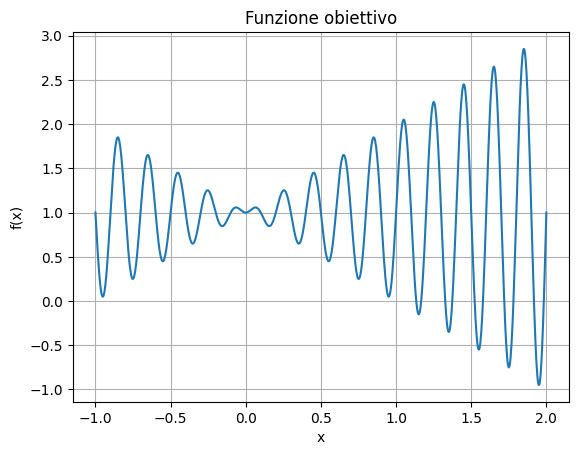

In [ ]:
plt.plot(x_vals, y_vals)
plt.title("Funzione obiettivo")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [3]:
population_size = 50
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1
domain = (-1, 2)

## Fitness: la misura della bontà di un individuo

Nel contesto degli algoritmi genetici, la funzione di fitness valuta quanto una soluzione sia "adatta" o "buona" rispetto all'obiettivo da raggiungere.

Nel nostro esempio, la fitness è direttamente data dalla funzione:

\[
f(x) = x \sin(10 \pi x) + 1
\]

per cui soluzioni con valori \(x\) che massimizzano questa funzione sono considerate migliori.

La fitness permette di:

- **Ordinare** la popolazione da cui selezionare i genitori;
- **Guidare l’evoluzione** verso le zone di massimo della funzione.

Nel grafico seguente vediamo come alcuni individui casuali si posizionano rispetto alla funzione obiettivo: i punti rossi indicano le soluzioni in termini di valore \(x\) e il loro fitness corrispondente.


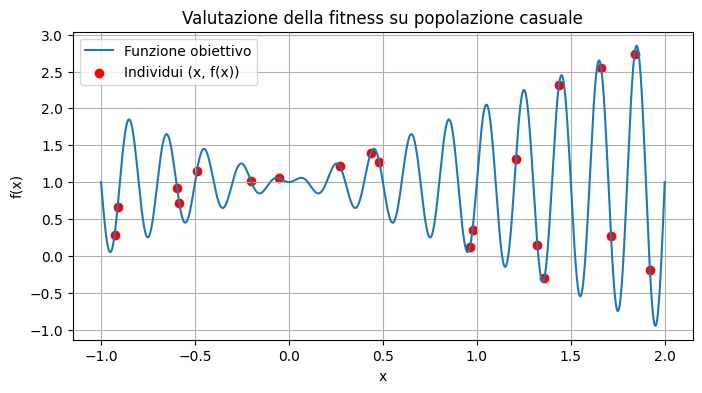

In [4]:
population = np.random.uniform(domain[0], domain[1], 20)
fitness = fitness_function(population)

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label="Funzione obiettivo")
plt.scatter(population, fitness, color="red", label="Individui (x, f(x))")
plt.title("Valutazione della fitness su popolazione casuale")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Crossover: la riproduzione e la combinazione genetica

Il crossover è l’operazione che prende due genitori e produce uno o più figli combinando le loro caratteristiche.

È l’elemento che permette di **mescolare informazioni utili** e creare soluzioni potenzialmente migliori.

Nel nostro esempio con rappresentazione reale, usiamo una forma semplice di crossover chiamata **media aritmetica**:

\[
\text{figlio} = \frac{\text{genitore}_1 + \text{genitore}_2}{2}
\]

In questo modo, il figlio si posiziona nel punto medio tra i due genitori nel dominio delle soluzioni.

Il grafico mostra i due genitori (punti blu) e il figlio (punto arancione), posizionati sulla curva della funzione obiettivo, per vedere visivamente l’effetto del crossover sulla soluzione.


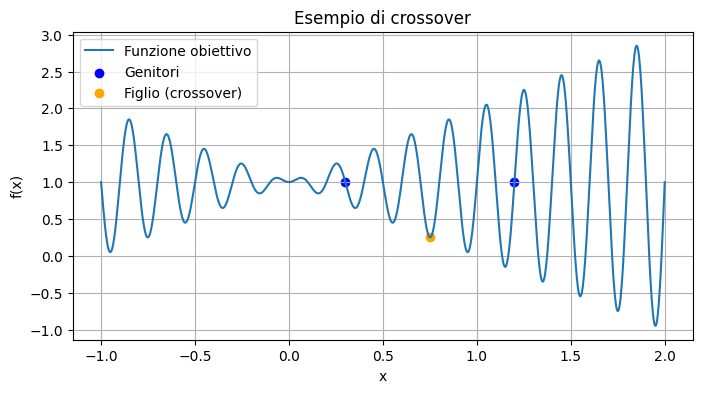

In [5]:
parent1, parent2 = 0.3, 1.2
child = 0.5 * (parent1 + parent2)

x_vals_example = [parent1, parent2, child]
y_vals_example = fitness_function(np.array(x_vals_example))

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label="Funzione obiettivo")
plt.scatter(
    [parent1, parent2],
    fitness_function(np.array([parent1, parent2])),
    color="blue",
    label="Genitori",
)
plt.scatter(child, fitness_function(child), color="orange", label="Figlio (crossover)")
plt.title("Esempio di crossover")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Mutazione: l’esplorazione casuale

La mutazione introduce variazioni casuali nei singoli individui per evitare che la popolazione converga prematuramente a soluzioni subottimali (locali).

Nel nostro esempio, la mutazione si traduce in una piccola perturbazione gaussiana:

\[
x' = x + \mathcal{N}(0, \sigma^2)
\]

dove \( \mathcal{N}(0, \sigma^2) \) è una variabile casuale normale con media zero e deviazione standard \(\sigma\).

Questo permette di esplorare intorno all’attuale soluzione.

Nel grafico vediamo un individuo originale (punto verde) e la sua versione mutata (punto rosso), posizionati sulla funzione obiettivo.


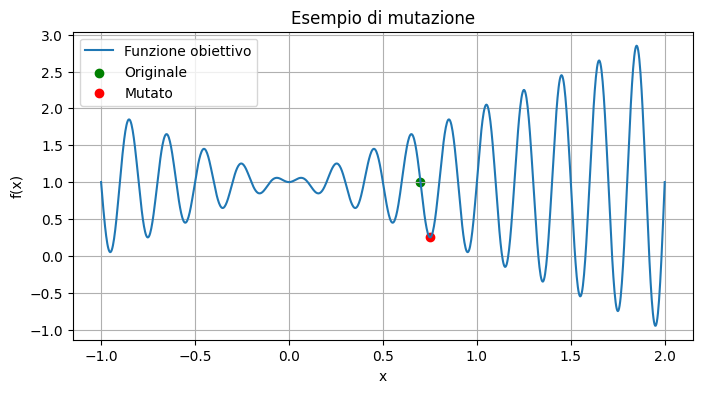

In [6]:
np.random.seed(42)
x_original = 0.7
x_mutated = x_original + np.random.normal(0, 0.1)
x_mutated = np.clip(x_mutated, domain[0], domain[1])

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label="Funzione obiettivo")
plt.scatter(x_original, fitness_function(x_original), color="green", label="Originale")
plt.scatter(x_mutated, fitness_function(x_mutated), color="red", label="Mutato")
plt.title("Esempio di mutazione")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Esecuzione dell’algoritmo genetico

Ora mettiamo insieme tutte le componenti:

- **Inizializziamo** una popolazione casuale di soluzioni.
- Per ogni generazione:
  - **Valutiamo** la fitness di ogni individuo.
  - **Selezioniamo** i genitori tramite un meccanismo come la selezione a torneo.
  - Applichiamo **crossover** e **mutazione** per generare una nuova popolazione.
  - Monitoriamo i valori di fitness migliori, medi e peggiori.

La popolazione evolve in modo da aumentare progressivamente la qualità delle soluzioni.

Visualizziamo la popolazione e la funzione obiettivo ad intervalli regolari per osservare l’evoluzione.


In [7]:
def initialize_population():
    return np.random.uniform(domain[0], domain[1], population_size)


def tournament_selection(pop, fitness, k=3):
    selected = np.random.choice(pop, k)
    selected_fitness = fitness_function(selected)
    return selected[np.argmax(selected_fitness)]


def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        return 0.5 * (parent1 + parent2)
    return parent1


def mutate(x):
    if np.random.rand() < mutation_rate:
        x += np.random.normal(0, 0.1)
        x = np.clip(x, domain[0], domain[1])
    return x

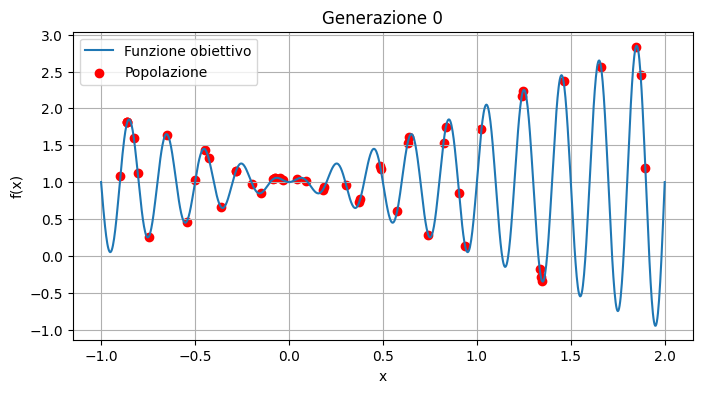

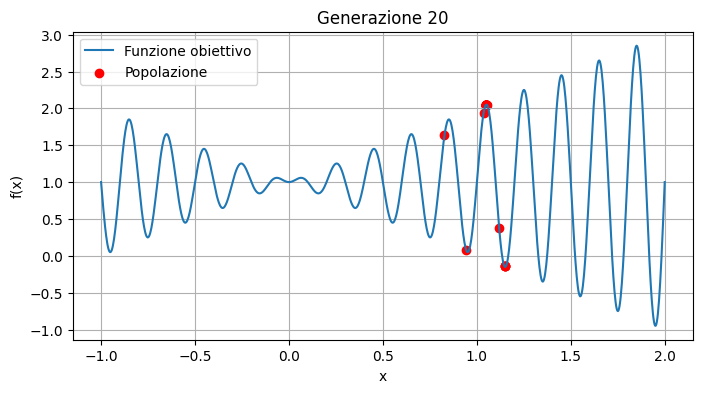

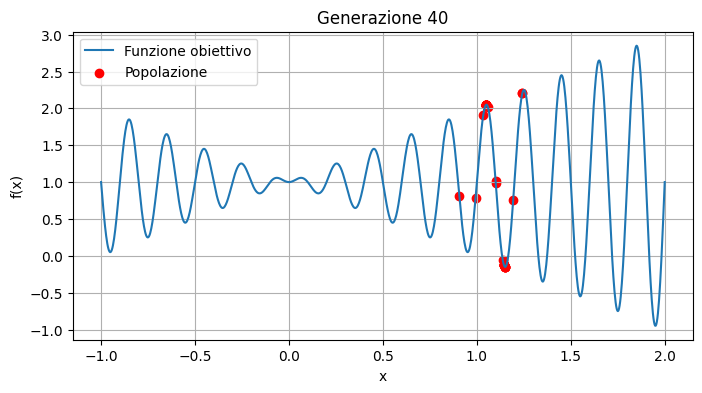

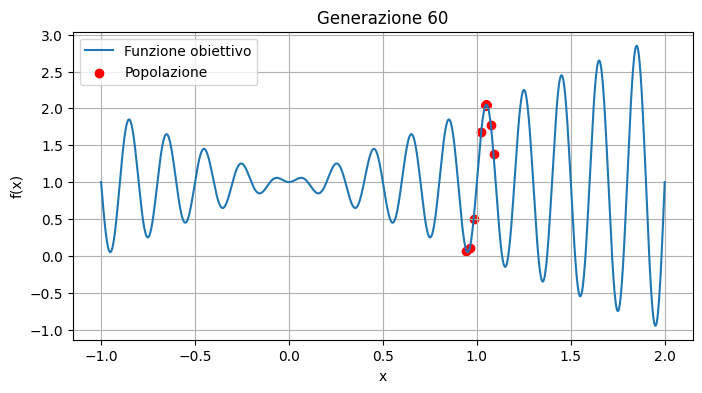

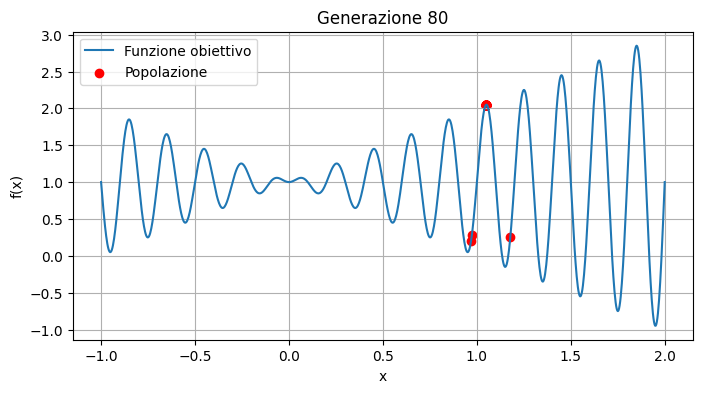

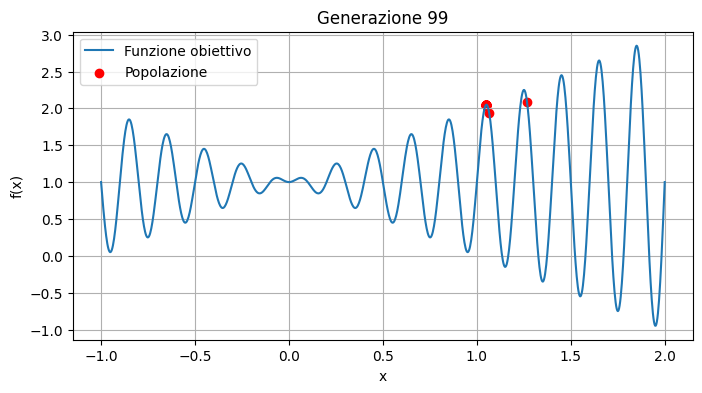

In [8]:
population = initialize_population()
best_fitness_per_gen = []
avg_fitness_per_gen = []
min_fitness_per_gen = []

for gen in range(generations):
    fitness = fitness_function(population)
    next_population = []

    for _ in range(population_size):
        parent1 = tournament_selection(population, fitness)
        parent2 = tournament_selection(population, fitness)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_population.append(child)

    population = np.array(next_population)
    f_vals = fitness_function(population)
    best_fitness_per_gen.append(np.max(f_vals))
    avg_fitness_per_gen.append(np.mean(f_vals))
    min_fitness_per_gen.append(np.min(f_vals))

    if gen % 20 == 0 or gen == generations - 1:
        plt.figure(figsize=(8, 4))
        plt.plot(x_vals, y_vals, label="Funzione obiettivo")
        plt.scatter(
            population, fitness_function(population), color="red", label="Popolazione"
        )
        plt.title(f"Generazione {gen}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.grid(True)
        plt.show()

In [9]:
best_individual = population[np.argmax(fitness_function(population))]
best_value = fitness_function(best_individual)

print(f"Miglior individuo: x = {best_individual:.5f}")
print(f"Valore massimo f(x): {best_value:.5f}")

Miglior individuo: x = 1.26713
Valore massimo f(x): 2.08810


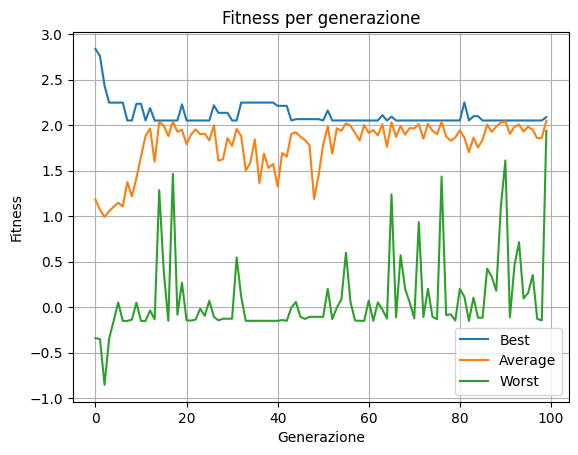

In [11]:
plt.plot(best_fitness_per_gen, label="Best")
plt.plot(avg_fitness_per_gen, label="Average")
plt.plot(min_fitness_per_gen, label="Worst")
plt.title("Fitness per generazione")
plt.xlabel("Generazione")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.show()

## Risultati finali

Dopo il numero di generazioni prestabilito, selezioniamo il miglior individuo come soluzione finale.

Nel nostro esempio, il valore di \(x\) corrispondente al massimo trovato e il suo valore di fitness sono mostrati.

Notiamo che la popolazione si concentra sulle zone di massimo della funzione obiettivo.

La convergenza è visibile anche dal grafico che mostra l’andamento della fitness (migliore, media e peggiore) nel tempo.
